<a href="https://colab.research.google.com/github/Arturo-Dn/Machine_ejercicios_documentos/blob/main/Copia_de_Practica_Scrap_EDAWoAns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MauricioRR-Tec/AprendizajeAutomatico/blob/master/Tema_2_AnalisisEstadistico/notebook/exercises/Practica_Scrap_EDAWoAns.ipynb)

<h1><center>Pr√°ctica de M√≥dulo 2</center><h1>

## ¬øQu√© es web scrapping?

Es una t√©cnica para recuperar grandes cantidades de datos de Internet.

-----

Existen diferentes t√©cnicas como Scrappy, BeautifulSoup, etc. La librer√≠a m√°s com√∫n es BeautifulSoup. 

Extrae la p√°gina Html de cualquier sitio web. Los datos almacenados por web Scrapping son un formato no estructurado. Convertimos los datos no estructurados en estructurados para el an√°lisis y la exploraci√≥n de datos.

------

### Bibliotecas utilizadas para Web Scraping

Como sabemos, Python se usa para varias aplicaciones y existen diferentes bibliotecas para diferentes prop√≥sitos. En nuestra demostraci√≥n adicional, usaremos las siguientes bibliotecas:

   * BeautifulSoup: Beautiful Soup es un paquete de Python para analizar documentos HTML y XML. Crea √°rboles de an√°lisis que son √∫tiles para extraer los datos f√°cilmente.
   * Pandas: Pandas es una biblioteca que se utiliza para la manipulaci√≥n y el an√°lisis de datos. Se utiliza para extraer los datos y almacenarlos en el formato deseado.
   * Utilice matplotlib y seaborn para la visualizaci√≥n de datos

------
### ¬øC√≥mo funciona el Web Scraping?

Cuando ejecuta el c√≥digo para web scraping, se env√≠a una solicitud a la URL que ha mencionado. Como respuesta a la solicitud, el servidor env√≠a los datos y le permite leer la p√°gina HTML o XML. Luego, el c√≥digo analiza la p√°gina HTML o XML, encuentra los datos y los extrae.

Para extraer datos utilizando web scraping con Python, debe seguir estos pasos b√°sicos:

   * Busque la URL que desea raspar
   * Inspecciona la p√°gina
   * Encuentra los datos que quieres extraer
   * Escribe el codigo
   * Ejecute el c√≥digo y extraiga los datos
   * Almacene los datos en el formato requerido

------

-------

### Datos del sitio web de Flipkart

Para comprobar cu√°l deber√≠a ser el precio √≥ptimo de nuestro producto, estos precios pueden variar mucho. Entonces, vamos a mostrar c√≥mo podemos obtener informaci√≥n relacionada con un producto en particular (computadora port√°til).

Primero, importemos todas las bibliotecas necesarias:

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

Los datos que extraemos son datos no estructurados. Por eso, crearemos listas vac√≠as para almacenarlas de forma estructurada

In [ ]:
name=[]
prices=[]
ratings=[]
df = pd.DataFrame()

## Paso 1: busque la URL

Para este ejemplo, vamos a **raspar** (Scrap) el sitio web de **Flipkart** para extraer el nombre, el precio y la calificaci√≥n de las computadoras port√°tiles. La URL de esta p√°gina es:

[Flipkart](https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY.)

In [ ]:
url = 'https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY.'

In [ ]:
req = requests.get(url)
response = req.content


In [ ]:
soup = BeautifulSoup(response, 'html.parser')

In [ ]:
soup

<!DOCTYPE doctype html>
<html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.7570a9.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><meta content="noodp" name="robots"/><link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/><link href="/apple-touch-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/><link hre

### Paso 2: inspecci√≥n de la p√°gina

Los datos suelen estar anidados en etiquetas. Entonces, inspeccionamos la p√°gina para ver, bajo qu√© etiqueta est√°n anidados los datos que queremos raspar. Para inspeccionar la p√°gina, simplemente haga clic derecho en el elemento y haga clic en "Inspeccionar" (o F12).

![img](https://miro.medium.com/max/571/0*TF2VBxPanqhxb-hY.png)

### Paso 3: busque los datos que desea extraer

Extraigamos el nombre, precio y calificaci√≥n que est√°n anidados en la etiqueta "div" respectivamente.

Por lo general, nos confundiremos sobre qu√© etiqueta necesitamos copiar para esta computadora port√°til. Podemos usar https://webformatter.com/ para filtrar la etiqueta por el nombre, el precio y la calificaci√≥n, y podemos copiar f√°cilmente con esta herramienta.

Ahora que hemos escrito el c√≥digo para abrir la URL, es hora de extraer los datos del sitio web. Como se mencion√≥ anteriormente, los datos que queremos extraer est√°n anidados en etiquetas <div>. Entonces, encontraremos las etiquetas div con esos respectivos nombres de clase, extraeremos y almacenaremos los datos en una variable. Consulte el c√≥digo a continuaci√≥n:

In [ ]:
main_box=soup.find_all("div", {"class":"_13oc-S"})


In [ ]:
len(main_box)

24

In [ ]:
box=main_box[1]

In [ ]:
box

<div class="_13oc-S"><div data-id="COMG3TZGKFNV9U3M" style="width:100%"><div class="_2kHMtA"><div class="_2tfzpE"><span>Ad</span></div><a class="_1fQZEK" href="/lenovo-ideapad-slim-5i-core-i5-11th-gen-8-gb-1-tb-hdd-256-gb-ssd-windows-10-home-15-itl-05-thin-light-laptop/p/itma7e9f12adc524?pid=COMG3TZGKFNV9U3M&amp;lid=LSTCOMG3TZGKFNV9U3MPAI1VV&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_2&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=en_cbNVuWWjkau%2BdQ2YebS%2F3yDbXlR1UbbpAZF9IbCn6VZgGeWodNsanxa5PrLIfigOH9fbOUqy9B1EeX5FqNqqAA%3D%3D&amp;ppt=None&amp;ppn=None&amp;ssid=k2w6jef7ao0000001631036758072&amp;qH=c06ea84a1e3dc3c6" rel="noopener noreferrer" target="_blank"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img alt="Lenovo Ideapad Slim 5i Core i5 11th Gen - (8 GB/1 TB HDD/256 GB SSD/Windows 10 Home) 15 ITL 05 Thin an..." class="_396cs4 _3exPp9" src="https://rukminim1.flixcart.com/image/312/

In [ ]:
title = box.find(name='div',attrs={'class':'_4rR01T'})#completa
rating = box.find(name='div',attrs={'class':'gUuXy-'}) #completa
price = box.find(name='div',attrs={'class':'_30jeq3 _1_WHN1'}) #completa

In [ ]:
print(rating.text)

4.154 Ratings¬†&¬†10 Reviews


In [ ]:
print(title.text,price.text,rating.text)

Lenovo Ideapad Slim 5i Core i5 11th Gen - (8 GB/1 TB HDD/256 GB SSD/Windows 10 Home) 15 ITL 05 Thin an... ‚Çπ60,990 4.154 Ratings¬†&¬†10 Reviews


In [ ]:
data_list=[]
for box in main_box:
    temp_dict={}
    title = box.find(name='div',attrs={'class':'_4rR01T'})#completa
    rating = box.find(name='div',attrs={'class':'gUuXy-'}) #completa
    price = box.find(name='div',attrs={'class':'_30jeq3 _1_WHN1'}) #completa
    #idx = title.text.find(" -")
    temp_dict["title"] = title.text
    try:
      temp_dict["rating"] = rating.text[0:3]
    except:
      temp_dict["rating"] = float("NaN") #Tambien puedes usar not rated
    temp_dict["price"] = price.text[1:]
    #completa
    data_list.append(temp_dict)

In [ ]:
data_list

[{'price': '57,990',
  'rating': nan,
  'title': 'Lenovo IdeaPad Ryzen 5 Hexa Core 5500U - (8 GB/512 GB SSD/Windows 10 Home) IdeaPad 5 15ALC05 Thin and ...'},
 {'price': '60,990',
  'rating': '4.1',
  'title': 'Lenovo Ideapad Slim 5i Core i5 11th Gen - (8 GB/1 TB HDD/256 GB SSD/Windows 10 Home) 15 ITL 05 Thin an...'},
 {'price': '45,990',
  'rating': '4.4',
  'title': 'Lenovo IdeaPad Slim 3i (2021) Core i3 11th Gen - (8 GB/512 GB SSD/Windows 10 Home) 14ITL6 Thin and Lig...'},
 {'price': '39,490',
  'rating': '4.3',
  'title': 'Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/1 TB HDD/Windows 10 Home) 15IML05 Thin and Light Laptop'},
 {'price': '29,990',
  'rating': '3.9',
  'title': 'Lenovo Ideapad 3 Athlon Dual Core 3050U - (4 GB/1 TB HDD/Windows 10 Home) 15ADA05 Laptop'},
 {'price': '40,990',
  'rating': '4.4',
  'title': 'HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Windows 10 Home) 14s- DY2501TU Thin and Light Laptop'},
 {'price': '38,990',
  'rating': '4.3',
  'title': 'ASUS Core i3 10th G

### Paso 4: Crear un dataframe y guardar los datos en csv

Despu√©s de extraer los datos, es posible que desee almacenarlos en un formato. Este formato var√≠a seg√∫n sus necesidades. Para este ejemplo, almacenaremos los datos extra√≠dos en formato CSV (valores separados por comas). Para hacer esto, agregar√© las siguientes l√≠neas a mi c√≥digo:

In [ ]:
df_bs = pd.DataFrame(data_list[:len(data_list)],columns=["title","rating","price"]) 
#completa

In [ ]:
df_bs #completa

title rating   price
0   Lenovo IdeaPad Ryzen 5 Hexa Core 5500U - (8 GB...    NaN  57,990
1   Lenovo Ideapad Slim 5i Core i5 11th Gen - (8 G...    4.1  60,990
2   Lenovo IdeaPad Slim 3i (2021) Core i3 11th Gen...    4.4  45,990
3   Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/1 TB...    4.3  39,490
4   Lenovo Ideapad 3 Athlon Dual Core 3050U - (4 G...    3.9  29,990
5   HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...    4.4  40,990
6   ASUS Core i3 10th Gen - (4 GB + 32 GB Optane/5...    4.3  38,990
7   Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...    NaN  44,990
8   DELL Vostro Core i3 10th Gen - (8 GB/256 GB SS...    4.2  38,777
9   acer Aspire 7 Ryzen 5 Hexa Core 5500U - (8 GB/...    4.5  66,190
10  DELL Vostro Core i3 10th Gen - (8 GB/1 TB HDD/...    41,  37,379
11  Lenovo Ideapad Slim 5 Ryzen 7 Octa Core 4700U ...    4.4  60,990
12  HP 15-ec1105AX Ryzen 5 Hexa Core 4600H - (8 GB...    4.5  59,990
13  DELL Inspiron Core i5 11th Gen - (8 GB/512 GB ...    4.7  68,990
14  DELL Inspiron Core i3 11th Gen - (4 GB/256 GB ...    4.1  37,590
15  Lenovo Ideapad Slim 3i (2021) Core i5 11th Gen...    3.9  54,990
16  Lenovo IdeaPad Core i3 10th Gen - (8 GB/256 GB...    4.2  39,490
17  ASUS VivoBook Ultra K14 (2021) Core i3 11th Ge...    4.3  44,990
18  DELL Inspiron Core i5 11th Gen - (8 GB/1 TB HD...    4.1  59,290
19  Lenovo Legion Core i5 9th Gen - (8 GB/1 TB HDD...    4.2  58,990
20  MSI GF63 Thin Hexa Core i5 10th Gen - (8 GB/1 ...    4.4  58,990
21  acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...    4.4  56,990
22  HP Pavilion Core i5 11th Gen - (16 GB/512 GB S...    4.5  66,990
23  Lenovo Ideapad Slim 5i Core i5 11th Gen - (8 G...    45   59,990

In [ ]:
df_bs.to_csv('computadoras.csv', encoding='utf-8')#completa("datos_compus.csv", index=False, encoding='utf-8')

### Paso 5: Un poco de EDA y visualizaci√≥n de este archivo

In [ ]:
new_df = pd.read_csv("/content/computadoras.csv", sep=None, thousands=',', engine='python') # puedo agraegar index_call = False #completa = #completa.read_csv("C:/Users/beyon/Documents/GitHub/02 Analisis Estadistico/notebook/exercises/datos_compus.csv", sep=None, thousands=',', engine='python')#completa

In [ ]:
new_df

Unnamed: 0  ...  price
0            0  ...  57990
1            1  ...  60990
2            2  ...  45990
3            3  ...  39490
4            4  ...  29990
5            5  ...  40990
6            6  ...  38990
7            7  ...  44990
8            8  ...  38777
9            9  ...  66190
10          10  ...  37379
11          11  ...  60990
12          12  ...  59990
13          13  ...  68990
14          14  ...  37590
15          15  ...  54990
16          16  ...  39490
17          17  ...  44990
18          18  ...  59290
19          19  ...  58990
20          20  ...  58990
21          21  ...  56990
22          22  ...  66990
23          23  ...  59990

[24 rows x 4 columns]

In [ ]:
del new_df["Unnamed: 0"]

In [ ]:
new_df

title  rating  price
0   Lenovo IdeaPad Ryzen 5 Hexa Core 5500U - (8 GB...     NaN  57990
1   Lenovo Ideapad Slim 5i Core i5 11th Gen - (8 G...     4.1  60990
2   Lenovo IdeaPad Slim 3i (2021) Core i3 11th Gen...     4.4  45990
3   Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/1 TB...     4.3  39490
4   Lenovo Ideapad 3 Athlon Dual Core 3050U - (4 G...     3.9  29990
5   HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...     4.4  40990
6   ASUS Core i3 10th Gen - (4 GB + 32 GB Optane/5...     4.3  38990
7   Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...     NaN  44990
8   DELL Vostro Core i3 10th Gen - (8 GB/256 GB SS...     4.2  38777
9   acer Aspire 7 Ryzen 5 Hexa Core 5500U - (8 GB/...     4.5  66190
10  DELL Vostro Core i3 10th Gen - (8 GB/1 TB HDD/...    41.0  37379
11  Lenovo Ideapad Slim 5 Ryzen 7 Octa Core 4700U ...     4.4  60990
12  HP 15-ec1105AX Ryzen 5 Hexa Core 4600H - (8 GB...     4.5  59990
13  DELL Inspiron Core i5 11th Gen - (8 GB/512 GB ...     4.7  68990
14  DELL Inspiron Core i3 11th Gen - (4 GB/256 GB ...     4.1  37590
15  Lenovo Ideapad Slim 3i (2021) Core i5 11th Gen...     3.9  54990
16  Lenovo IdeaPad Core i3 10th Gen - (8 GB/256 GB...     4.2  39490
17  ASUS VivoBook Ultra K14 (2021) Core i3 11th Ge...     4.3  44990
18  DELL Inspiron Core i5 11th Gen - (8 GB/1 TB HD...     4.1  59290
19  Lenovo Legion Core i5 9th Gen - (8 GB/1 TB HDD...     4.2  58990
20  MSI GF63 Thin Hexa Core i5 10th Gen - (8 GB/1 ...     4.4  58990
21  acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...     4.4  56990
22  HP Pavilion Core i5 11th Gen - (16 GB/512 GB S...     4.5  66990
23  Lenovo Ideapad Slim 5i Core i5 11th Gen - (8 G...    45.0  59990

In [ ]:
new_df.shape#completa

(24, 3)

In [ ]:
new_df.size

72

In [ ]:
new_df.dtypes

title      object
rating    float64
price       int64
dtype: object

In [ ]:
new_df.dtypes#completa

title      object
rating    float64
price       int64
dtype: object

Quiero dividir el t√≠tulo debido a todas las especificaciones y nombres de port√°tiles en una fila.

Lo dividiremos en diferentes columnas por separado usando la opci√≥n split ()

In [ ]:
new_df['model'], new_df['spec'] = new_df['title'].str.split('-', 1).str
del new_df['title']
new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


rating  ...                                               spec
0     NaN  ...   (8 GB/512 GB SSD/Windows 10 Home) IdeaPad 5 1...
1     4.1  ...   (8 GB/1 TB HDD/256 GB SSD/Windows 10 Home) 15...
2     4.4  ...   (8 GB/512 GB SSD/Windows 10 Home) 14ITL6 Thin...
3     4.3  ...   (8 GB/1 TB HDD/Windows 10 Home) 15IML05 Thin ...
4     3.9  ...     (4 GB/1 TB HDD/Windows 10 Home) 15ADA05 Laptop

[5 rows x 4 columns]

In [ ]:
new_df['RAM'], new_df['storage'] = new_df['spec'].str.split('/', 1).str
del new_df['spec']
new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


rating  price  ...     RAM                                            storage
0     NaN  57990  ...   (8 GB  512 GB SSD/Windows 10 Home) IdeaPad 5 15ALC05 ...
1     4.1  60990  ...   (8 GB  1 TB HDD/256 GB SSD/Windows 10 Home) 15 ITL 05...
2     4.4  45990  ...   (8 GB  512 GB SSD/Windows 10 Home) 14ITL6 Thin and Li...
3     4.3  39490  ...   (8 GB  1 TB HDD/Windows 10 Home) 15IML05 Thin and Lig...
4     3.9  29990  ...   (4 GB           1 TB HDD/Windows 10 Home) 15ADA05 Laptop

[5 rows x 5 columns]

Usamos esta opci√≥n dividida (split "-") para separar del t√≠tulo y crear una columna separada como modelo y especificaci√≥n y eliminar el t√≠tulo

In [ ]:

new_df['Storage'], new_df['OS'] = new_df['storage'].str.split('/', 1).str
del new_df['storage']
new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


rating  price  ...     Storage                                                OS
0     NaN  57990  ...  512 GB SSD   Windows 10 Home) IdeaPad 5 15ALC05 Thin and ...
1     4.1  60990  ...    1 TB HDD  256 GB SSD/Windows 10 Home) 15 ITL 05 Thin an...
2     4.4  45990  ...  512 GB SSD           Windows 10 Home) 14ITL6 Thin and Lig...
3     4.3  39490  ...    1 TB HDD    Windows 10 Home) 15IML05 Thin and Light Laptop
4     3.9  29990  ...    1 TB HDD                   Windows 10 Home) 15ADA05 Laptop

[5 rows x 6 columns]

In [ ]:

new_df['System'], new_df['Other_Info'] = new_df['OS'].str.split(')', 1).str
del new_df['OS']
new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


rating  price  ...                      System                       Other_Info
0     NaN  57990  ...             Windows 10 Home   IdeaPad 5 15ALC05 Thin and ...
1     4.1  60990  ...  256 GB SSD/Windows 10 Home             15 ITL 05 Thin an...
2     4.4  45990  ...             Windows 10 Home           14ITL6 Thin and Lig...
3     4.3  39490  ...             Windows 10 Home    15IML05 Thin and Light Laptop
4     3.9  29990  ...             Windows 10 Home                   15ADA05 Laptop

[5 rows x 7 columns]

In [ ]:
new_df

rating  ...                            Other_Info
0      NaN  ...        IdeaPad 5 15ALC05 Thin and ...
1      4.1  ...                  15 ITL 05 Thin an...
2      4.4  ...                14ITL6 Thin and Lig...
3      4.3  ...         15IML05 Thin and Light Laptop
4      3.9  ...                        15ADA05 Laptop
5      4.4  ...   14s- DY2501TU Thin and Light Laptop
6      4.3  ...      X515JA-EJ372TS Thin and Light...
7      NaN  ...          15ITL6 Thin and Light Laptop
8      4.2  ...     Vostro 3401 Thin and Light Laptop
9      4.5  ...                                   NaN
10    41.0  ...     Vostro 3401 Thin and Light Laptop
11     4.4  ...               14ARE05 Thin and Lig...
12     4.5  ...                                   NaN
13     4.7  ...           Inspiron 5410 2 in 1 Laptop
14     4.1  ...                  Inspiron 3501 Laptop
15     3.9  ...                15ITL6 Thin and Lig...
16     4.2  ...       14 IML 05 Thin and Light Laptop
17     4.3  ...                 K413EA-EB302TS Thi...
18     4.1  ...    INSPIRON 3501 Thin and Light La...
19     4.2  ...                      Y540-15IRH-PG...
20     4.4  ...                                   NaN
21     4.4  ...                                   NaN
22     4.5  ...     14-dv0054TU Thin and Light Laptop
23    45.0  ...         14ITL05U2a Thin and Light ...

[24 rows x 7 columns]

Continuemos hasta conseguir lo siguiente...

In [ ]:
new_df['RAM'] = new_df['RAM'].apply(lambda x: str(str(x)[1:]))
new_df

rating  ...                            Other_Info
0      NaN  ...        IdeaPad 5 15ALC05 Thin and ...
1      4.1  ...                  15 ITL 05 Thin an...
2      4.4  ...                14ITL6 Thin and Lig...
3      4.3  ...         15IML05 Thin and Light Laptop
4      3.9  ...                        15ADA05 Laptop
5      4.4  ...   14s- DY2501TU Thin and Light Laptop
6      4.3  ...      X515JA-EJ372TS Thin and Light...
7      NaN  ...          15ITL6 Thin and Light Laptop
8      4.2  ...     Vostro 3401 Thin and Light Laptop
9      4.5  ...                                   NaN
10    41.0  ...     Vostro 3401 Thin and Light Laptop
11     4.4  ...               14ARE05 Thin and Lig...
12     4.5  ...                                   NaN
13     4.7  ...           Inspiron 5410 2 in 1 Laptop
14     4.1  ...                  Inspiron 3501 Laptop
15     3.9  ...                15ITL6 Thin and Lig...
16     4.2  ...       14 IML 05 Thin and Light Laptop
17     4.3  ...                 K413EA-EB302TS Thi...
18     4.1  ...    INSPIRON 3501 Thin and Light La...
19     4.2  ...                      Y540-15IRH-PG...
20     4.4  ...                                   NaN
21     4.4  ...                                   NaN
22     4.5  ...     14-dv0054TU Thin and Light Laptop
23    45.0  ...         14ITL05U2a Thin and Light ...

[24 rows x 7 columns]

In [ ]:
new_df['price'] = new_df['price'].apply(lambda x: int(int(x)))
new_df['rating'] = new_df['rating'].apply(lambda x: float(float(x)))
new_df


rating  ...                            Other_Info
0      NaN  ...        IdeaPad 5 15ALC05 Thin and ...
1      4.1  ...                  15 ITL 05 Thin an...
2      4.4  ...                14ITL6 Thin and Lig...
3      4.3  ...         15IML05 Thin and Light Laptop
4      3.9  ...                        15ADA05 Laptop
5      4.4  ...   14s- DY2501TU Thin and Light Laptop
6      4.3  ...      X515JA-EJ372TS Thin and Light...
7      NaN  ...          15ITL6 Thin and Light Laptop
8      4.2  ...     Vostro 3401 Thin and Light Laptop
9      4.5  ...                                   NaN
10    41.0  ...     Vostro 3401 Thin and Light Laptop
11     4.4  ...               14ARE05 Thin and Lig...
12     4.5  ...                                   NaN
13     4.7  ...           Inspiron 5410 2 in 1 Laptop
14     4.1  ...                  Inspiron 3501 Laptop
15     3.9  ...                15ITL6 Thin and Lig...
16     4.2  ...       14 IML 05 Thin and Light Laptop
17     4.3  ...                 K413EA-EB302TS Thi...
18     4.1  ...    INSPIRON 3501 Thin and Light La...
19     4.2  ...                      Y540-15IRH-PG...
20     4.4  ...                                   NaN
21     4.4  ...                                   NaN
22     4.5  ...     14-dv0054TU Thin and Light Laptop
23    45.0  ...         14ITL05U2a Thin and Light ...

[24 rows x 7 columns]

In [ ]:
new_df.dtypes

rating        float64
price           int64
model          object
RAM            object
Storage        object
System         object
Other_Info     object
dtype: object

In [ ]:
new_df_limpio = new_df.to_csv('new_df_limpio.csv', encoding='utf-8')#completa("datos_compus.csv", index=False, encoding='utf-8')

### Paso 6: Identificaci√≥n de valores perdidos

Los m√©todos isnull () y notnull () son las formas m√°s comunes de identificar valores perdidos.

Mientras maneja los datos faltantes, primero debe identificar las filas y columnas que contienen los valores faltantes, contar el n√∫mero de valores faltantes y luego decidir c√≥mo desea tratarlos.

Es importante que trate los valores faltantes en cada columna por separado, en lugar de implementar una √∫nica soluci√≥n (por ejemplo, reemplazar los NaN por la media de una columna) para todas las columnas.

isnull () devuelve un valor booleano (Verdadero / Falso) que luego se puede usar para encontrar las filas o columnas que contienen valores perdidos.

In [ ]:
pd.isna(new_df)#completa

rating  price  model    RAM  Storage  System  Other_Info
0     True  False  False  False    False   False       False
1    False  False  False  False    False   False       False
2    False  False  False  False    False   False       False
3    False  False  False  False    False   False       False
4    False  False  False  False    False   False       False
5    False  False  False  False    False   False       False
6    False  False  False  False    False   False       False
7     True  False  False  False    False   False       False
8    False  False  False  False    False   False       False
9    False  False  False  False    False   False        True
10   False  False  False  False    False   False       False
11   False  False  False  False    False   False       False
12   False  False  False  False    False   False        True
13   False  False  False  False    False   False       False
14   False  False  False  False    False   False       False
15   False  False  False  False    False   False       False
16   False  False  False  False    False   False       False
17   False  False  False  False    False   False       False
18   False  False  False  False    False   False       False
19   False  False  False  False    False   False       False
20   False  False  False  False    False   False        True
21   False  False  False  False    False   False        True
22   False  False  False  False    False   False       False
23   False  False  False  False    False   False       False

### Identificaci√≥n de valores perdidos en columnas

Primero calculemos el n√∫mero total de valores faltantes en el marco de datos. Puede calcular el n√∫mero de valores perdidos en cada columna mediante df.isnull().Sum()

In [ ]:
new_df.isnull().sum()#completa

rating        2
price         0
model         0
RAM           0
Storage       0
System        0
Other_Info    4
dtype: int64

In [ ]:
new_df[["model"]].count()#completa

model    24
dtype: int64

In [ ]:
#completa

In [ ]:
new_df[["model"]].groupby(new_df.model).count()#completa

model
model                                                  
ASUS Core i3 10th Gen                                 1
ASUS VivoBook Ultra K14 (2021) Core i3 11th Gen       1
DELL Inspiron Core i3 11th Gen                        1
DELL Inspiron Core i5 11th Gen                        2
DELL Vostro Core i3 10th Gen                          2
HP 14s Core i3 11th Gen                               1
HP 15                                                 1
HP Pavilion Core i5 11th Gen                          1
Lenovo IdeaPad 3 Core i3 10th Gen                     1
Lenovo IdeaPad 3 Core i3 11th Gen                     1
Lenovo IdeaPad Core i3 10th Gen                       1
Lenovo IdeaPad Ryzen 5 Hexa Core 5500U                1
Lenovo IdeaPad Slim 3i (2021) Core i3 11th Gen        1
Lenovo Ideapad 3 Athlon Dual Core 3050U               1
Lenovo Ideapad Slim 3i (2021) Core i5 11th Gen        1
Lenovo Ideapad Slim 5 Ryzen 7 Octa Core 4700U         1
Lenovo Ideapad Slim 5i Core i5 11th Gen               2
Lenovo Legion Core i5 9th Gen                         1
MSI GF63 Thin Hexa Core i5 10th Gen                   1
acer Aspire 7 Core i5 10th Gen                        1
acer Aspire 7 Ryzen 5 Hexa Core 5500U                 1

In [ ]:
new_df.describe()

rating         price
count  22.000000     24.000000
mean    7.809091  51251.500000
std    11.408598  11477.322662
min     3.900000  29990.000000
25%     4.200000  39490.000000
50%     4.350000  55990.000000
75%     4.475000  59990.000000
max    45.000000  68990.000000

In [ ]:
#completa

In [ ]:
new_df.dtypes#completa

rating        float64
price           int64
model          object
RAM            object
Storage        object
System         object
Other_Info     object
dtype: object

Ahora necesitamos filtrar las mejores computadoras port√°tiles con buenas especificaciones, precio y calificaci√≥n de la lista

Muestra los siguientes resultados:
 * Laptops en rating <= 4
 * Laptops con rating >= 3.5 y un precio entre 30 y 40 mil $

In [ ]:
new_df

rating  ...                            Other_Info
0      NaN  ...        IdeaPad 5 15ALC05 Thin and ...
1      4.1  ...                  15 ITL 05 Thin an...
2      4.4  ...                14ITL6 Thin and Lig...
3      4.3  ...         15IML05 Thin and Light Laptop
4      3.9  ...                        15ADA05 Laptop
5      4.4  ...   14s- DY2501TU Thin and Light Laptop
6      4.3  ...      X515JA-EJ372TS Thin and Light...
7      NaN  ...          15ITL6 Thin and Light Laptop
8      4.2  ...     Vostro 3401 Thin and Light Laptop
9      4.5  ...                                   NaN
10    41.0  ...     Vostro 3401 Thin and Light Laptop
11     4.4  ...               14ARE05 Thin and Lig...
12     4.5  ...                                   NaN
13     4.7  ...           Inspiron 5410 2 in 1 Laptop
14     4.1  ...                  Inspiron 3501 Laptop
15     3.9  ...                15ITL6 Thin and Lig...
16     4.2  ...       14 IML 05 Thin and Light Laptop
17     4.3  ...                 K413EA-EB302TS Thi...
18     4.1  ...    INSPIRON 3501 Thin and Light La...
19     4.2  ...                      Y540-15IRH-PG...
20     4.4  ...                                   NaN
21     4.4  ...                                   NaN
22     4.5  ...     14-dv0054TU Thin and Light Laptop
23    45.0  ...         14ITL05U2a Thin and Light ...

[24 rows x 7 columns]

In [ ]:
especific_df = new_df.loc[(new_df["rating"]<= 4.0) & (new_df["rating"]>= 3.5) & (new_df["price"]>= 30000) & (new_df["price"]<= 40000)]
especific_df

Empty DataFrame
Columns: [rating, price, model, RAM, Storage, System, Other_Info]
Index: []

In [ ]:
#completa

In [ ]:
#completa

---------

### Visualizaci√≥n de los datos

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

#completa

Realizaremos una gr√°fica de barras de precio vs rating

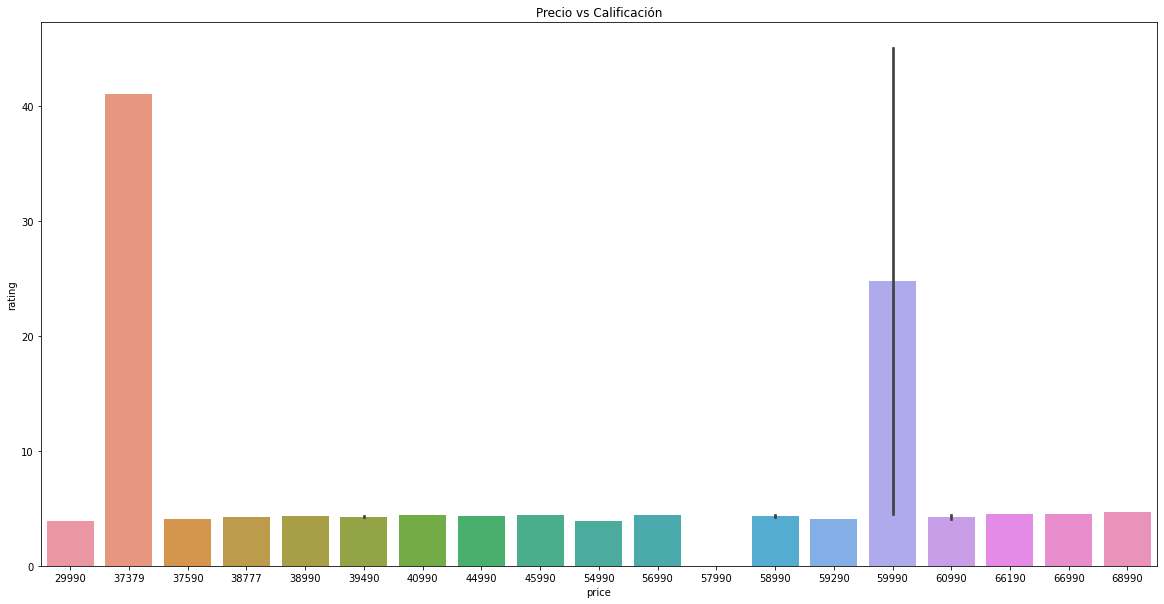

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x=new_df['price'], y=new_df['rating'])
plt.title("Precio vs Calificaci√≥n")

#plt.savefig("test.png")
plt.show()
#completa

In [ ]:
#completa

Podemos concluir a partir de aqu√≠ que los productos con precios m√°s altos tienen calificaciones m√°s altas hasta cierto punto.

In [ ]:
#completa

## ¬øLes ha salido alg√∫n discordante visual a ustedes?

In [ ]:
#si, pero es por los modelos de computadoras 

### ¬øPara ustedes, cu√°les fueron las computadoras m√°s caras?

In [ ]:
#depende del momento en el que se haga el webscrapping

----
----
----

<h1><center>Monte Carlo</center><h1>

### ¬øPor qu√© la casa siempre gana?

¬øC√≥mo ganan dinero los casinos? El truco es sencillo: "Cuanto m√°s juegas, m√°s ganan". Echemos un vistazo a c√≥mo funciona esto con un ejemplo simple de simulaci√≥n de Monte Carlo.

----

Considere un juego imaginario en el que un jugador tiene que elegir una ficha de una bolsa de fichas.

Reglas:
 * Hay fichas que contienen n√∫meros que van del 1 al 100 en una bolsa.
 * Los usuarios pueden apostar en fichas pares o impares.
 * En este juego, el 10 y el 11 son n√∫meros especiales. Si apostamos a pares, entonces 10 se contar√° como un n√∫mero impar, y si apostamos a las probabilidades, entonces 11 se contar√° como un n√∫mero par.
 * Si apostamos a n√∫meros pares y obtenemos 10, perdemos.
 * Si apostamos a n√∫meros impares y obtenemos 11, perdemos.

Si apostamos por las probabilidades, la probabilidad de que ganemos es de 49/100. 

---

La probabilidad de que la casa gane es de 51/100. 

---

### Importamos librer√≠as

In [1]:
import random
import matplotlib.pyplot as plt

### Creaci√≥n de las apuestas del jugador

In [9]:
#Player bet
choice = input("Deseas apostar a pares o impares? \n")

#Pares
if choice == "Par":
    def pickNote():
        note = random.randint(1,100)
        if (note % 2) == 0 and note != 10:
            return True
        else:
            return False

elif choice == "Odd":
    def pickNote():
        note = random.randint(1,100)
        if (note % 2) != 0 and note != 11:
          return True
        else:
          return False

Deseas apostar a pares o impares? 
Par


### Funci√≥n principal

In [10]:
def play(total_money, bet_money, total_plays):
    num_plays=[]
    money=[]

    play = 1
    
    for play in range(total_plays):
        if pickNote():
            total_money = total_money + bet_money
            num_plays.append(play)
            money.append(total_money)
            
        else:
            total_money = total_money - bet_money
            num_plays.append(play)
            money.append(total_money)
    
    plt.ylabel("Dinero en $")
    plt.xlabel("Numero de apuestas")
    plt.plot(num_plays, money)
    
    final_funds.append(money[-1])
    return(final_funds)

### Resultado final

[10000, 8800, 9600, 11200, 10200, 8800, 11200, 11200, 9600, 10000]
100600
El jugador empez√≥ con $10,000
El jugador se fue con $ 10060.0


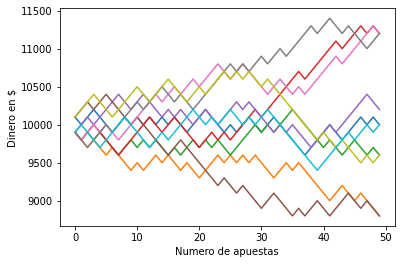

In [11]:
final_funds = []
for i in range(10):
    ending_fund = play(10000, 100, 50)
    
print(ending_fund)
print(sum(ending_fund))

print("El jugador empez√≥ con $10,000")
print("El jugador se fue con $", str(sum(ending_fund)/len(ending_fund)))

## Ahora, para un total de apuestas de 5, 10 y 1000....

### Ahora para mil iteraciones

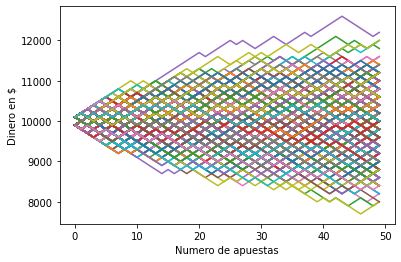

In [12]:
final_funds = []
for i in range(1000):
  ending_fund = play(10000,100,50)

In [13]:
print(ending_fund)
print(sum(ending_fund))

[8600, 9600, 9400, 9000, 12200, 10600, 10000, 10800, 10200, 9400, 9200, 9800, 9600, 9200, 10400, 10200, 8200, 9800, 11200, 10400, 11200, 10200, 9400, 10000, 8600, 9000, 10400, 10800, 9400, 10600, 10600, 9200, 9800, 9800, 10000, 9800, 11600, 11200, 8800, 10400, 10200, 10800, 9600, 10600, 10400, 10400, 9400, 10200, 10600, 11000, 9400, 9400, 10000, 9600, 9200, 8600, 9800, 10000, 9400, 9200, 9800, 9400, 10000, 10200, 10000, 11000, 9600, 9200, 10200, 10400, 10400, 9400, 9200, 9200, 10200, 10600, 10600, 10000, 9400, 10000, 9400, 9800, 10800, 9600, 9600, 9200, 9800, 9600, 10800, 10200, 9400, 10200, 9800, 10400, 10000, 11400, 9200, 10600, 10200, 9600, 9600, 9800, 8800, 10200, 10200, 11200, 8600, 10200, 10200, 9600, 10200, 9800, 10800, 10400, 11000, 9800, 9600, 10000, 8800, 10200, 10200, 9200, 10200, 10000, 9800, 8600, 10600, 10600, 9600, 9800, 9400, 10000, 11800, 10400, 10000, 10200, 10600, 9800, 9400, 10000, 9200, 10800, 8800, 10000, 9200, 9200, 11600, 10200, 10400, 11000, 10000, 8800, 10000,

In [15]:
print("El jugador empez√≥ con $10,000")
print("El jugador se fue con $", str(sum(ending_fund)/len(ending_fund)))

El jugador empez√≥ con $10,000
El jugador se fue con $ 9907.4


### ¬øQu√© conclusiones puedes inferir a partir del ejercicio anterior?

In [16]:
#Podemos concluir que Montecarlo te permite generar una predicci√≥n aproximada de los posibles escenarios de un problema

----

Tenga en cuenta que estos porcentajes son para nuestro juego figurativo y pueden modificarse....


-------

Al igual que con cualquier modelo de pron√≥stico, la simulaci√≥n solo ser√° tan buena como las estimaciones que hagamos. Es importante recordar que la simulaci√≥n de Monte Carlo solo representa probabilidades y no certeza. Sin embargo, la simulaci√≥n de Monte Carlo puede ser una herramienta valiosa a la hora de pronosticar un futuro desconocido.